In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df['country']=df['country'].fillna(df['country'].mode()[0])

In [6]:
df.drop(columns=['company'],axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.describe(include='O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,49078,56477,97870,85994,74053,104641,89613,75166,1461


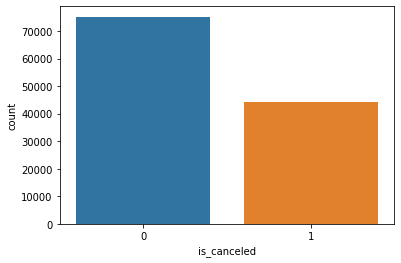

In [8]:
sns.countplot(df['is_canceled'])
plt.show()

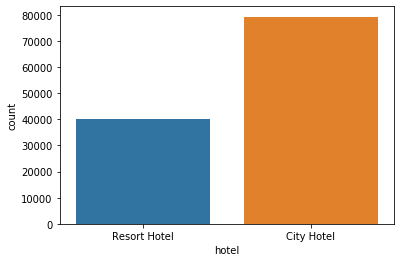

In [9]:
sns.countplot(df['hotel'])
plt.show()

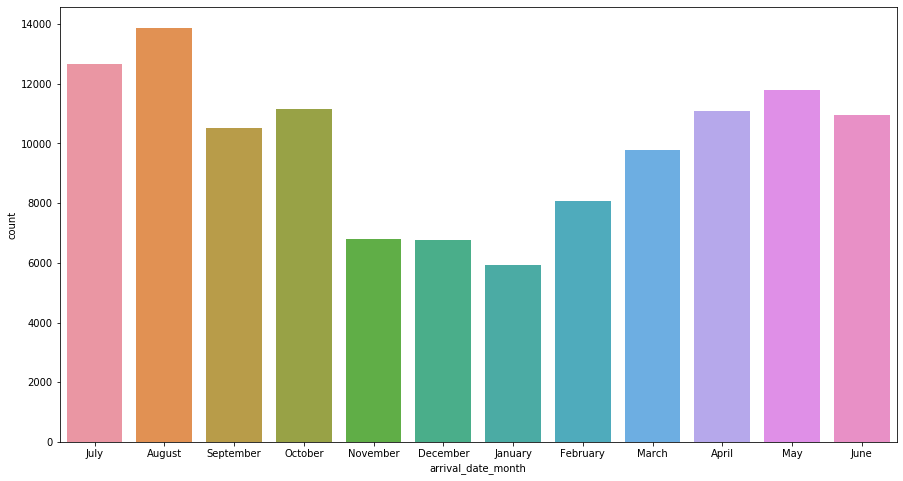

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(df['arrival_date_month'])

In [11]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [12]:
trace=go.Bar(
                        x=df['country'].value_counts().index,
                        y=df['country'].value_counts(),
                        name='country')

layout=go.Layout(title='country',
                                legend=dict(orientation='h'))

data=[trace]
fig=go.Figure(data,layout)
iplot(fig)

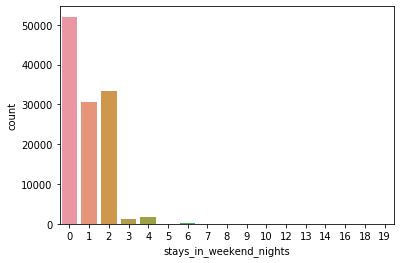

In [13]:
sns.countplot(df['stays_in_weekend_nights'])

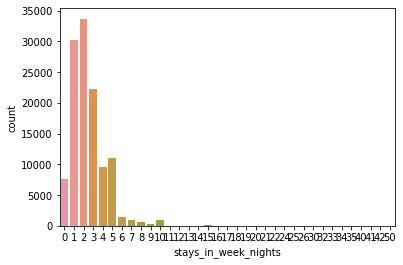

In [14]:
sns.countplot(df['stays_in_week_nights'])

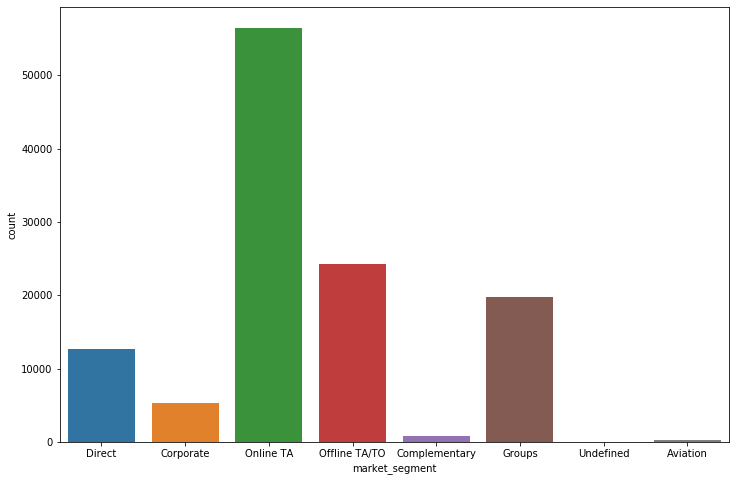

In [15]:
plt.figure(figsize=(12.,8))
sns.countplot(df['market_segment'])

In [16]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'], dtype=object)

In [17]:
df['arrival_date_month']=df['arrival_date_month'].map({'July':'07','August':'08','September':'09','October':'10','November':'11','December':'12',
                                                       'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06'})
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,07,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,07,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,07,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,07,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,07,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [18]:
df['arrival_date_year']=df['arrival_date_year'].astype(str)
df['arrival_date_month']=df['arrival_date_month'].astype(str)
df['arrival_date_day_of_month']=df['arrival_date_day_of_month'].astype(str)
df['check_in']=df['arrival_date_year']+df['arrival_date_month']+df['arrival_date_day_of_month']
df['check_in']=pd.to_datetime(df['check_in'],format='%Y%m%d')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,check_in
0,Resort Hotel,0,342,2015,07,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,07,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,07,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,07,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,07,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [19]:
df['arrival_date_year']=df['arrival_date_year'].astype(int)
df['arrival_date_month']=df['arrival_date_month'].astype(int)
df['arrival_date_day_of_month']=df['arrival_date_day_of_month'].astype(int)

In [20]:
pd.crosstab(df['is_canceled'],df['arrival_date_month'])

arrival_date_month,1,2,3,4,5,6,7,8,9,10,11,12
is_canceled,,,,,,,,,,,,
0,4122,5372,6645,6565,7114,6404,7919,8638,6392,6914,4672,4409
1,1807,2696,3149,4524,4677,4535,4742,5239,4116,4246,2122,2371


In [21]:
df[['stays_in_weekend_nights','is_canceled']].groupby('stays_in_weekend_nights',as_index=False).mean().sort_values(by='is_canceled',ascending=False)

,stays_in_weekend_nights,is_canceled
7,7,0.736842
9,9,0.636364
6,6,0.568627
8,8,0.566667
5,5,0.544304
0,0,0.375034
2,2,0.374835
1,1,0.359401
3,3,0.352661
14,16,0.333333


In [22]:
#required_car_parking_spacesは削除
df[['required_car_parking_spaces','is_canceled']].groupby('required_car_parking_spaces',as_index=False).mean().sort_values(by='is_canceled',ascending=False)

,required_car_parking_spaces,is_canceled
0,0,0.394949
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,8,0.000000


In [23]:
df['booking_date']=[row['check_in']-datetime.timedelta(days=row['lead_time']) for index,row in df.iterrows()]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,check_in,booking_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2014-07-24
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2013-06-24
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-24
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-18
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-06-17


timedeltaのdays=はintのみなのでfor文のリスト内包表記で取得。取得方法は<span style="color: red; ">df.iterrows()を使う</span>

[pandas.DataFrameのforループ処理（イテレーション）](https://note.nkmk.me/python-pandas-dataframe-for-iteration/)

In [24]:
df['check_in_week']=df['check_in'].dt.day_name()

In [25]:
df[['is_canceled','check_in_week']].groupby('check_in_week',as_index=False).count().sort_values(by='is_canceled',ascending=False)

,check_in_week,is_canceled
0,Friday,19631
4,Thursday,19254
1,Monday,18171
2,Saturday,18055
6,Wednesday,16139
3,Sunday,14141
5,Tuesday,13999


In [26]:
df[['is_canceled','check_in_week']].groupby('check_in_week',as_index=False).mean().sort_values(by='is_canceled',ascending=False)

,check_in_week,is_canceled
4,Thursday,0.411707
0,Friday,0.406398
2,Saturday,0.394849
6,Wednesday,0.361299
1,Monday,0.340928
5,Tuesday,0.328595
3,Sunday,0.322749


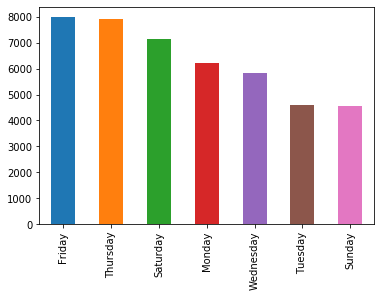

In [27]:
#is_canceled==1がキャンセル
df[df['is_canceled']==1]['check_in_week'].value_counts().sort_values(ascending=False).plot.bar()

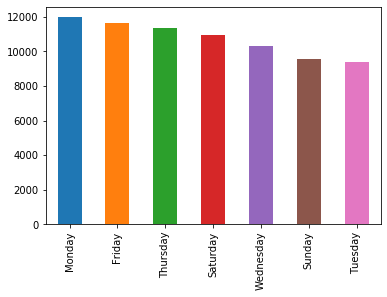

In [28]:
#is_canceled==0が宿泊
df[df['is_canceled']==0]['check_in_week'].value_counts().sort_values(ascending=False).plot.bar()

In [29]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,check_in,booking_date,check_in_week
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2014-07-24,Wednesday
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2013-06-24,Wednesday
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-24,Wednesday
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-18,Wednesday
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-06-17,Wednesday


In [30]:
df[['is_canceled','adults']].groupby('adults',as_index=False).mean().sort_values(by='is_canceled',ascending=False)
df['adults']=df['adults'].mean()

In [31]:
df[['is_canceled','stays_in_weekend_nights']].groupby('stays_in_weekend_nights',as_index=False).mean()

,stays_in_weekend_nights,is_canceled
0,0,0.375034
1,1,0.359401
2,2,0.374835
3,3,0.352661
4,4,0.322372
5,5,0.544304
6,6,0.568627
7,7,0.736842
8,8,0.566667
9,9,0.636364


In [32]:
df[['is_canceled','stays_in_week_nights']].groupby('stays_in_week_nights',as_index=False).mean()

,stays_in_week_nights,is_canceled
0,0,0.250229
1,1,0.324348
2,2,0.441575
3,3,0.382110
4,4,0.365471
5,5,0.348560
6,6,0.388259
7,7,0.313897
8,8,0.335366
9,9,0.411255


In [33]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [34]:
trace=go.Bar(
                        x=df['country'].value_counts().index,
                        y=df['country'].value_counts(),
                        name='country')

layout=go.Layout(title='country',
                                legend=dict(orientation='h'))

data=[trace]
fig=go.Figure(data,layout)
iplot(fig)

In [35]:
df[['check_in_week','adr']].groupby('check_in_week',as_index=False).mean().sort_values(by='adr',ascending=False)

,check_in_week,adr
0,Friday,105.520062
3,Sunday,104.328023
1,Monday,102.745802
2,Saturday,102.134619
5,Tuesday,100.636051
4,Thursday,98.679109
6,Wednesday,98.583838


In [36]:
df[['reserved_room_type','is_canceled']].groupby('reserved_room_type',as_index=False).mean().sort_values(by='is_canceled',ascending=False)

,reserved_room_type,is_canceled
9,P,1.000000
7,H,0.407654
0,A,0.391074
6,G,0.364374
8,L,0.333333
2,C,0.330472
1,B,0.329159
3,D,0.317796
5,F,0.303763
4,E,0.292884


In [37]:
df[['meal','is_canceled']].groupby('meal',as_index=False).mean().sort_values(by='is_canceled',ascending=False)

,meal,is_canceled
1,FB,0.598997
0,BB,0.373849
3,SC,0.372394
2,HB,0.344603
4,Undefined,0.244654


In [38]:
df[['deposit_type','is_canceled']].groupby('deposit_type',as_index=False).mean().sort_values(by='is_canceled',ascending=False)

,deposit_type,is_canceled
1,Non Refund,0.993624
0,No Deposit,0.283770
2,Refundable,0.222222


In [39]:
from sklearn.preprocessing import LabelEncoder
cat_col=['deposit_type','meal','reserved_room_type','hotel','country','market_segment','reservation_status','check_in_week']
for col in cat_col:
    lbl=LabelEncoder()
    df[col]=lbl.fit_transform(df[col].values)

In [40]:
delete_col=['arrival_date_week_number','children','babies','distribution_channel',
                       'assigned_room_type','agent','company','customer_type','required_car_parking_spaces','reservation_status_date',
                       'check_in','booking_date']

df=df.drop(columns=delete_col)

In [41]:
X=df.drop(columns=['is_canceled'],axis=1)
y=df['is_canceled']

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [44]:
log_reg=LogisticRegression().fit(X_train,y_train)
score=log_reg.score(X_test,y_test)
print(score)

0.989212007505


In [48]:
df[['arrival_date_month','adr']].groupby('arrival_date_month',as_index=False).mean().sort_values(by='adr',ascending=False)

,arrival_date_month,adr
7,8,140.111523
6,7,126.788013
5,6,116.672192
4,5,108.695516
8,9,105.049657
3,4,100.380790
9,10,87.908879
11,12,81.076776
2,3,80.679646
10,11,73.794962


キャンセル率はほぼ半分。
利用はシティホテルがリゾートの倍。
利用月は7,8月が特に多い。一番少ない月は１月。12月,1月は家で家族と過ごす人が多いのかもしれません。
国別の利用はPRTが圧倒的に多い。
料金は金曜日が一番高く、水曜日、木曜日が安め。
キャンセルするかしないかは予約の際にキャンセル料金の返金ができなことが大きく影響してる模様。

安く旅行するには11月,2月,1月がおすすめ。逆に8月,7月は旅行に行く人が多い為、高い。